***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [10]:
dataset = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/Estatistica/main/dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
bins = [dataset.Renda.min(), 
        788 * 2, 
        788 * 5, 
        788 * 15, 
        788 * 25, 
        dataset.Renda.max()]
bins

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [ ]:
labels = ['E', 'D','C','B','A']

### 3º Construir a coluna de frequências

In [ ]:
frequencias = pd.cut(dataset.Renda,
       bins = bins,
       labels = labels,
       include_lowest=True     
).value_counts()
frequencias

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percentuais = pd.cut(dataset.Renda,
       bins = bins,
       labels = labels,
       include_lowest=True     
).value_counts(normalize=True)
percentuais

Renda
E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
tabela = pd.DataFrame({'Frequencia' : frequencias, 'Porcentagem (%)' : round(percentuais,2) * 100}).sort_index(ascending=False)
tabela

,Frequencia,Porcentagem (%)
Renda,,
A,822,1.0
B,7241,9.0
C,18602,24.0
D,27573,36.0
E,22182,29.0


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda', ylabel='Frequencia'>

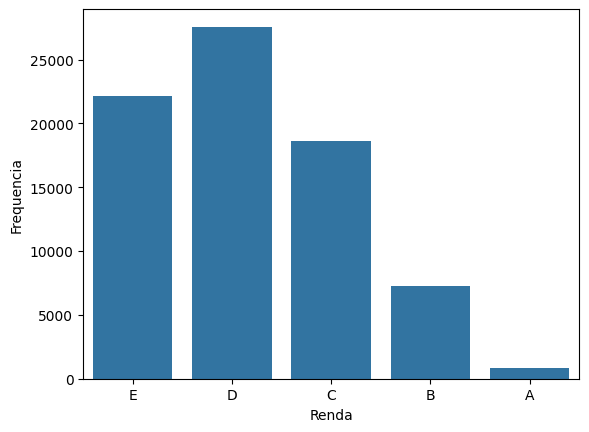

In [ ]:
sns.barplot(tabela, x ='Renda', y='Frequencia')

> ### Conclusões

- As pessoas que recebem até 5 SM representam mais da metade da nossa amostra, 55%. 
- Apenas 1% da população recebe mais de 25 SM

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Axes: xlabel='Idade', ylabel='Count'>

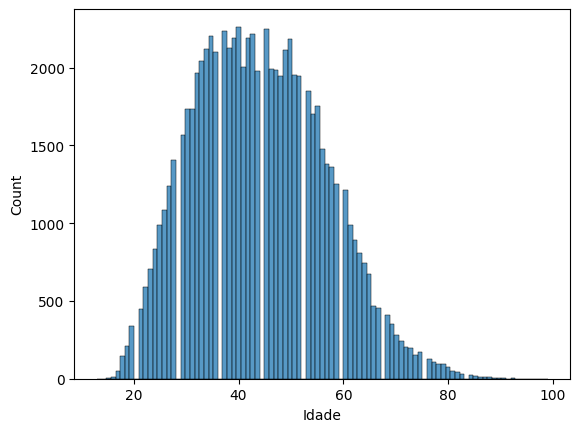

In [ ]:
sns.histplot(dataset.Idade)

<Axes: xlabel='Altura', ylabel='Count'>

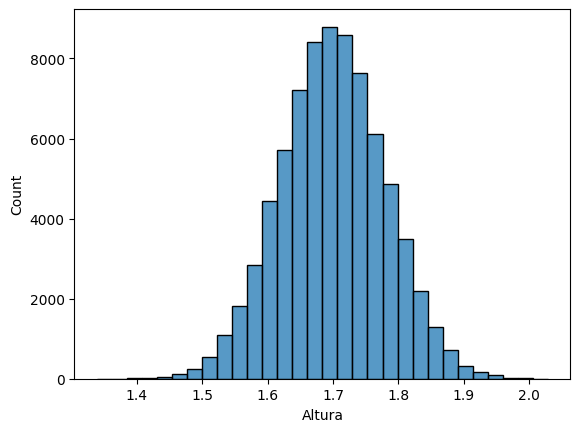

In [ ]:
sns.histplot(dataset.Altura, bins = 30)

<Axes: xlabel='Renda', ylabel='Count'>

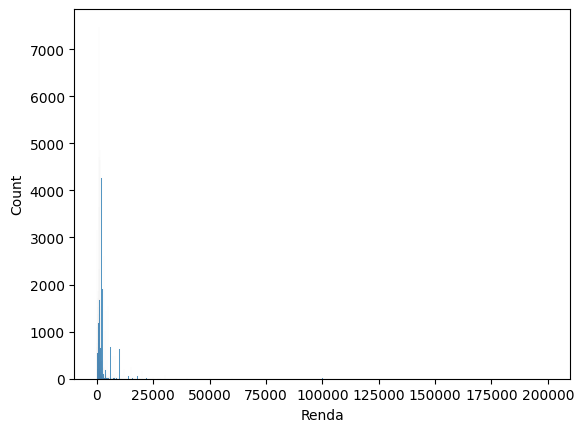

In [ ]:
sns.histplot(dataset.Renda)

> ### Conclusões

``Variável Idade`` possui uma assimetria à direita, pois a maioria dos nossos entrevistados tem idades entre 20 e 60, e pessoas com idades mais avançandas nos nossos dados levam a causar essa assimetria;

``Variável Altura`` é simétrica;

``Variável Renda`` possui uma assimetria à direita, pois temos algumas rendas muito discrepantes da maioria causando essa assimetria.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: xlabel='Renda', ylabel='Count'>

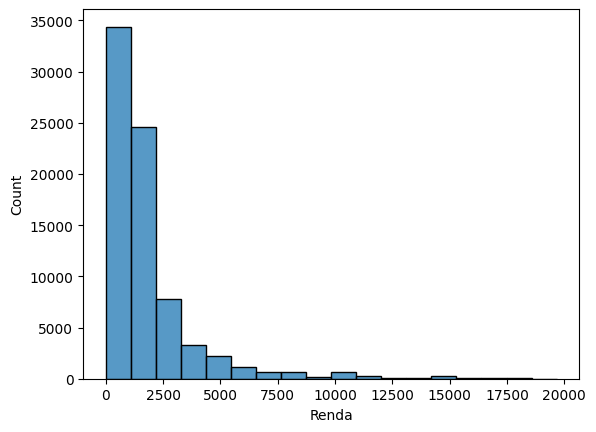

In [ ]:
sns.histplot(dataset.query('Renda < 20_000').Renda, bins = 18)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
tabela_cruzada = pd.crosstab(dataset['Sexo'], dataset['Cor']).rename(columns = cor, index = sexo)
tabela_cruzada

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
tabela_cruzada = round((pd.crosstab(dataset['Sexo'], dataset['Cor'], normalize=True)*100),2).rename(columns = cor, index = sexo)
tabela_cruzada

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dataset.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dataset.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dataset.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
(dataset.Renda - dataset.Renda.mean()).abs().mean()

1526.4951371638058

### Obtenha a variância

In [ ]:
dataset.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [ ]:
dataset.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
tabela_cruzada = pd.crosstab(dataset['Sexo'], dataset['Cor'], values=dataset['Renda'], aggfunc={'mean', 'median', 'max'}).rename(columns = cor, index = sexo)
round(tabela_cruzada,2)

max                                    mean                    \
Cor       Indígena  Branca  Preta Amarela   Parda Indígena   Branca    Preta   
Sexo                                                                           
Masculino    10000  200000  50000   50000  100000  1081.71  2925.74  1603.86   
Feminino    120000  100000  23000   20000   30000  2464.39  2109.87  1134.60   

                              median                                  
Cor        Amarela    Parda Indígena  Branca   Preta Amarela   Parda  
Sexo                                                                  
Masculino  4758.25  1659.58    797.5  1700.0  1200.0  2800.0  1200.0  
Feminino   3027.34  1176.76    788.0  1200.0   800.0  1500.0   800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
tabela_cruzada = pd.crosstab(dataset['Sexo'], dataset['Cor'], values=dataset['Renda'], aggfunc={'var', 'std'}).rename(columns = cor, index = sexo)
round(tabela_cruzada,2)

std                                               var  \
Cor        Indígena   Branca    Preta  Amarela    Parda      Indígena   
Sexo                                                                    
Masculino   1204.09  4750.79  1936.31  5740.82  2312.09  1.449841e+06   
Feminino   11957.50  3251.01  1349.80  3731.17  1596.23  1.429818e+08   

                                                             
Cor             Branca       Preta      Amarela       Parda  
Sexo                                                         
Masculino  22570023.41  3749293.59  32957069.62  5345747.15  
Feminino   10569086.53  1821959.52  13921656.88  2547959.94

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [ ]:
dataset.Sexo = dataset.Sexo.replace(sexo)
dataset.Cor = dataset.Cor.replace(cor)

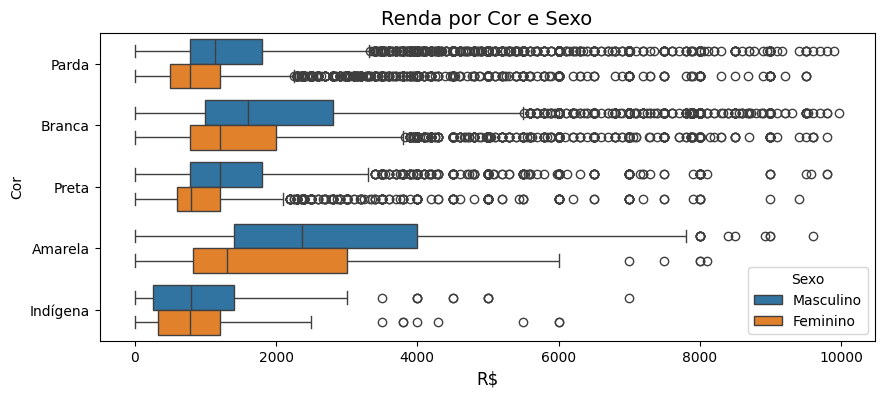

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dataset.query('Renda < 10_000'), orient='h')
ax.set_title('Renda por Cor e Sexo', fontsize=14)
ax.set_xlabel('R$', fontsize=12)
ax.figure.set_size_inches(10,4)

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


scipy.stats.percentileofscore(a, score, kind='rank', nan_policy='propagate')

In [ ]:
from scipy import stats

print(f'{round(stats.percentileofscore(dataset.Renda, 788, kind='weak'),2)}% das pessoas recebem menos de 788 R$.')

28.87% das pessoas recebem menos de 788 R$.


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
dataset.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
pd.crosstab(dataset['Anos de Estudo'], dataset['Sexo'], values=dataset['Renda'], aggfunc=['mean', 'median', 'max', 'std'])

mean                median                max  \
Sexo               Feminino    Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
1                516.201748   799.494638    390.0     700.0    10000   
2                492.771987   895.629047    400.0     788.0     2000   
3                529.911638   931.178986    450.0     788.0     4000   
4                546.853916  1109.203862    500.0     800.0     3500   
5                704.279111  1302.329283    788.0    1000.0    10000   
6                781.389776  1338.653218    788.0    1045.0     8000   
7                833.732824  1448.875419    788.0    1200.0     6000   
8                830.751004  1465.497940    788.0    1200.0     9000   
9                933.615351  1639.396667    800.0    1300.0    18000   
10               868.021700  1508.038850    788.0    1200.0    20000   
11               925.919225  1731.270847    800.0    1218.0     6000   
12              1286.790889  2117.060504   1000.0    1500.0   100000   
13              1682.313725  2470.330776   1200.0    1800.0   120000   
14              1911.730047  3195.099154   1300.0    2400.0    20000   
15              2226.460457  3706.620269   1600.0    2500.0    20000   
16              3899.513231  6134.279790   2800.0    4000.0   100000   
17               798.174419  1295.761905    788.0    1200.0     3000   

                                  std               
Sexo           Masculino     Feminino    Masculino  
Anos de Estudo                                      
1                  30000   639.311534  1023.904884  
2                  30000   425.291842  1331.950552  
3                  40000   498.234168  1435.173827  
4                  80000   424.124446  2143.800133  
5                  50000   629.553397  1419.821787  
6                  35000   635.782641  1484.650587  
7                  25000   574.547028  1476.628602  
8                  40000   602.038029  1419.708673  
9                  30000   896.781213  1515.583715  
10                 60000   973.221652  2137.664774  
11                 45000   620.611907  2078.609734  
12                200000  1819.040417  2676.538942  
13                 30000  4851.833513  2268.081538  
14                 25000  2053.789771  2797.116800  
15                 50000  2064.083336  3987.214974  
16                200000  4212.770709  7447.613594  
17                  7000   459.985964   979.648745

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

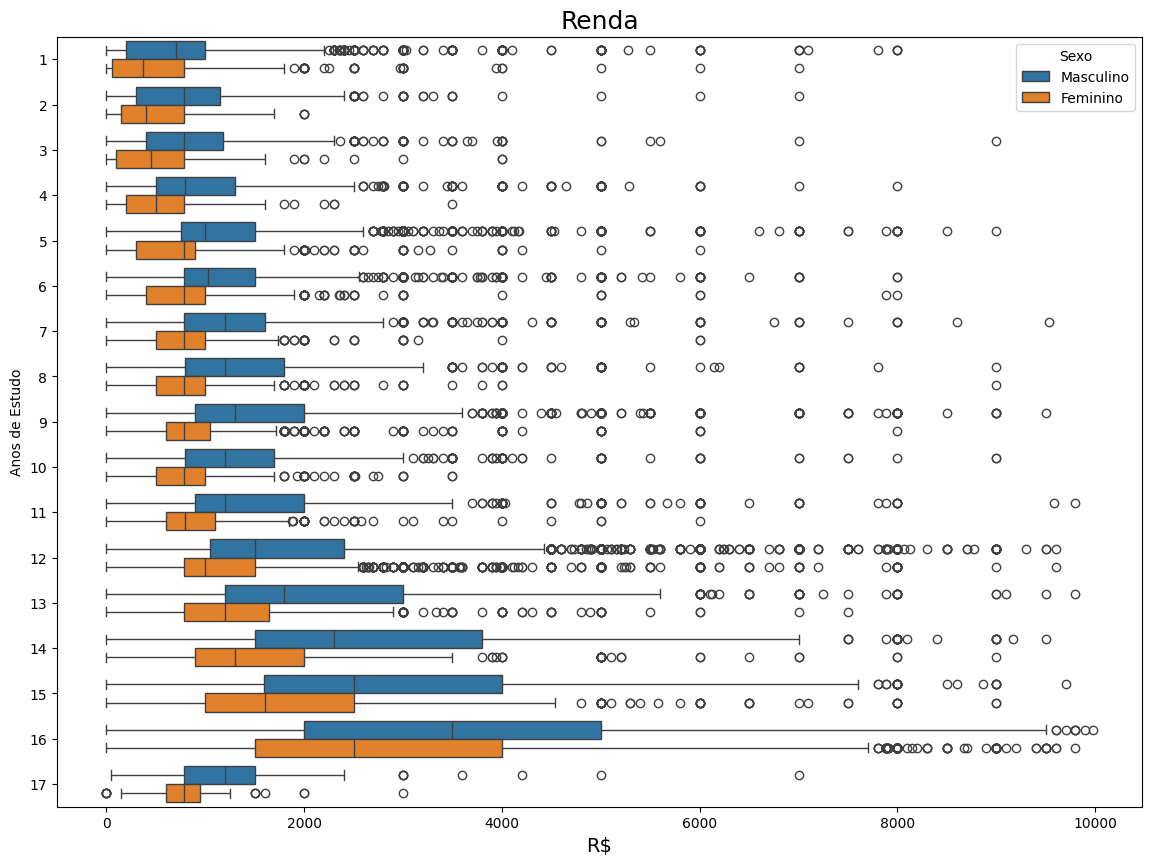

In [ ]:
ax = sns.boxplot(data = dataset.query('Renda < 10_000'), y = 'Anos de Estudo', x = 'Renda', orient = 'h', hue = 'Sexo')
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.figure.set_size_inches(14,10)

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
dataset.groupby(['UF']).agg({'Renda':['mean', 'median', 'max', 'std']})

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

C:\Users\Fabiane\AppData\Local\Temp\ipykernel_7072\1805418680.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'Renda', y = 'UF', data=dataset.query('Renda < 10000'), orient='h', palette='Paired')
C:\Users\Fabiane\AppData\Local\Temp\ipykernel_7072\1805418680.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([key for key in uf.values()], fontsize=12)


<Axes: title={'center': 'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

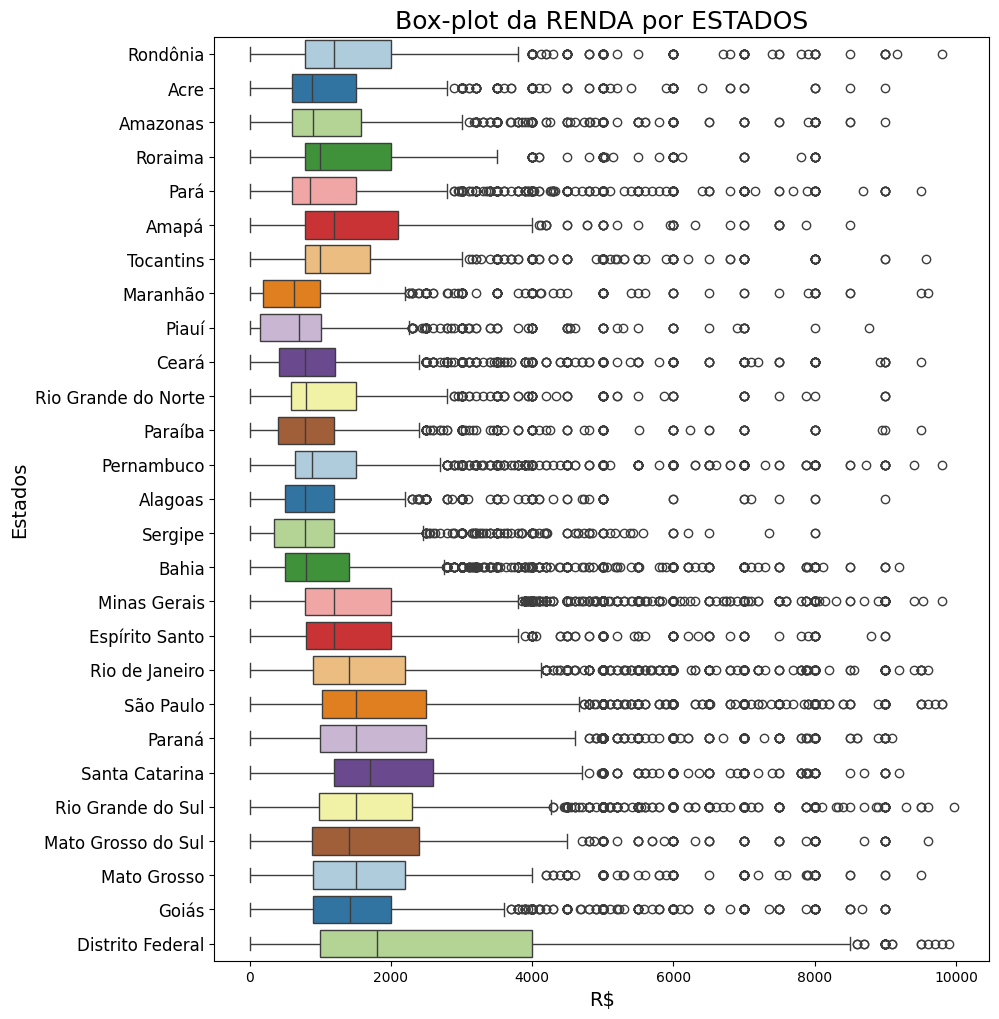

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dataset.query('Renda < 10000'), orient='h', palette='Paired')
ax.figure.set_size_inches(10, 12)    
ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    
ax.set_xlabel('R$', fontsize=14)   
ax.set_ylabel('Estados', fontsize=14)    
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    
ax

> ### Conclusões

Escreva suas conclusões aqui...